# Explicit orthogonal regression

Estimate the parameters of a scalar non-linear model from experimental data.

$$ y = f(x, \bm{\beta}) =  \frac{\beta_1 x^2 + x (1-x)}{\beta_1 x^2 + 2 x (1-x) + \beta_2 (1-x)^2} $$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from odrpack import odr_fit

First, we define the experimental data and the model function. 

In [2]:
xdata = np.array([0.100, 0.300, 0.400, 0.500, 0.600, 0.700, 0.800])
ydata = np.array([0.059, 0.243, 0.364, 0.486, 0.583, 0.721, 0.824])

In [3]:
def f(x: np.ndarray, beta: np.ndarray) -> np.ndarray:
    b1, b2 = beta
    return (b1*x**2 + x*(1 - x))/(b1*x**2 + 2*x*(1 - x) + b2*(1 - x)**2)

Then, we define an initial guess for the model parameters `beta` and, optionally, also the corresponding bounds.

In [4]:
beta0 = np.array([1.0, 1.0])

lower = np.array([0.0, 0.0])
upper = np.array([2.0, 2.0])

Lastly, we define the weights for `x` and `y` based on a suitable rationale, such as the estimated uncertainty of each variable.

In [5]:
sigma_x = 0.01
sigma_y = 0.05

weight_x = 1/sigma_x**2
weight_y = 1/sigma_y**2

We can now launch the regression! If you want to see a brief computation report, set `report='short'`.

In [6]:
sol = odr_fit(f, xdata, ydata, beta0,
              bounds=(lower, upper),
              weight_x=weight_x, weight_y=weight_y)

The result is packed in a `OdrResult` dataclass. Let's check the solution convergence and the estimated model parameters.

In [7]:
sol.stopreason

'Sum of squares convergence.'

In [8]:
sol.beta

array([1.4291868 , 1.67473433])

All fine! Let's plot the solution.

Text(0, 0.5, 'y')

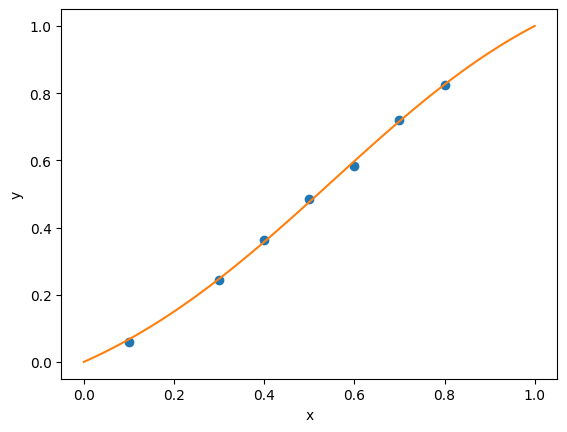

In [9]:
_, ax = plt.subplots()

# Plot experimental data
ax.plot(xdata, ydata, 'o')

# Plot fitted model
xm = np.linspace(0.0, 1.0, 100)
ym = f(xm, sol.beta)
ax.plot(xm, ym)
ax.set_xlabel('x')
ax.set_ylabel('y')